<a href="https://colab.research.google.com/github/Rexoes/Artificial-Intelligence-and-Deep-Learning-in-Health-PhD-Lecture/blob/main/AUE_Tuberculosis_TransferLearning_PreprocessedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rarfile
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import rarfile
import os

# .rar dosyasının yolu
rar_path = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database.rar'

# Dosyanın çıkarılacağı hedef klasör
output_dir = '/content/drive/MyDrive/AUE_TB_TL/dataset'

# Hedef klasör yoksa oluştur
# os.makedirs(output_dir, exist_ok=True)

# .rar dosyasını aç ve çıkar
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(output_dir)

print(f"'{rar_path}' başarıyla '{output_dir}' klasörüne çıkarıldı!")

'/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database.rar' başarıyla '/content/drive/MyDrive/AUE_TB_TL/dataset' klasörüne çıkarıldı!


In [ ]:
preprocessed_folder_path = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/'
cleaned_folder_path = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Cleaned Database/'
original_folder_path = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Original Database/'

# Normal Etiket Klasör yolları
preprocessed_normal_folder_path = preprocessed_folder_path + 'Normal/'
cleaned_normal_folder_path = cleaned_folder_path + 'Normal/'
original_normal_folder_path = original_folder_path + 'Normal/'

# .png uzantılı dosyaları say
preprocessed_normal_png_files = [f for f in os.listdir(preprocessed_normal_folder_path) if f.lower().endswith('.png')]
cleaned_normal_png_files = [f for f in os.listdir(cleaned_normal_folder_path) if f.lower().endswith('.png')]
original_normal_png_files = [f for f in os.listdir(original_normal_folder_path) if f.lower().endswith('.png')]

preprocessed_normal_png_count = len(preprocessed_normal_png_files)
cleaned_normal_png_count = len(cleaned_normal_png_files)
original_normal_png_count = len(original_normal_png_files)


# TB Etiket Klasör yolları
preprocessed_tb_folder_path = preprocessed_folder_path + 'Tuberculosis/'
cleaned_tb_folder_path = cleaned_folder_path + 'Tuberculosis/'
original_tb_folder_path = original_folder_path + 'Tuberculosis/'

# .png uzantılı dosyaları say
preprocessed_tb_png_files = [f for f in os.listdir(preprocessed_tb_folder_path) if f.lower().endswith('.png')]
cleaned_tb_png_files = [f for f in os.listdir(cleaned_tb_folder_path) if f.lower().endswith('.png')]
original_tb_png_files = [f for f in os.listdir(original_tb_folder_path) if f.lower().endswith('.png')]

preprocessed_tb_png_count = len(preprocessed_tb_png_files)
cleaned_tb_png_count = len(cleaned_tb_png_files)
original_tb_png_count = len(original_tb_png_files)

print('--------------------------------------------------------------------')
print(f"Preprocessed - Normal Klasöründeki .png dosya sayısı: {preprocessed_normal_png_count}")
print(f"Preprocessed - TB Klasöründeki .png dosya sayısı: {preprocessed_tb_png_count}")

print('--------------------------------------------------------------------')
print(f"Cleaned - Normal Klasöründeki .png dosya sayısı: {cleaned_normal_png_count}")
print(f"Cleaned - TB Klasöründeki .png dosya sayısı: {cleaned_tb_png_count}")

print('--------------------------------------------------------------------')
print(f"Original - Normal Klasöründeki .png dosya sayısı: {original_normal_png_count}")
print(f"Original - TB Klasöründeki .png dosya sayısı: {original_tb_png_count}")


--------------------------------------------------------------------
Preprocessed - Normal Klasöründeki .png dosya sayısı: 3500
Preprocessed - TB Klasöründeki .png dosya sayısı: 3500
--------------------------------------------------------------------
Cleaned - Normal Klasöründeki .png dosya sayısı: 3393
Cleaned - TB Klasöründeki .png dosya sayısı: 2660
--------------------------------------------------------------------
Original - Normal Klasöründeki .png dosya sayısı: 3500
Original - TB Klasöründeki .png dosya sayısı: 3500


In [ ]:
import os
import shutil

# Mevcut klasör yolları
tuberculosis_folder = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Tuberculosis'
normal_folder = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Normal'

# Görsellerin taşınacağı hedef klasör
train_folder = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/train'

# Hedef klasörü oluştur (zaten varsa hata vermez)
os.makedirs(train_folder, exist_ok=True)

# Sayıcılar
success_count = 0
error_count = 0

# Hataları saklamak için bir liste
error_log = []

# Tuberculosis klasöründeki görselleri kopyala
for file_name in os.listdir(tuberculosis_folder):
    if file_name.endswith('.png'):  # Sadece .png dosyalarını seç
        src_path = os.path.join(tuberculosis_folder, file_name)
        dst_path = os.path.join(train_folder, file_name)
        try:
            shutil.copy2(src_path, dst_path)
            success_count += 1
        except Exception as e:
            error_count += 1
            error_log.append((src_path, str(e)))

# Normal klasöründeki görselleri kopyala
for file_name in os.listdir(normal_folder):
    if file_name.endswith('.png'):  # Sadece .png dosyalarını seç
        src_path = os.path.join(normal_folder, file_name)
        dst_path = os.path.join(train_folder, file_name)
        try:
            shutil.copy2(src_path, dst_path)
            success_count += 1
        except Exception as e:
            error_count += 1
            error_log.append((src_path, str(e)))

# Sonuçları yazdır
print(f"Başarıyla kopyalanan dosya sayısı: {success_count}")
print(f"Hatalı kopyalanan dosya sayısı: {error_count}")

if error_count > 0:
    print("Hatalar:")
    for error in error_log:
        print(f"Dosya: {error[0]} - Hata: {error[1]}")


Başarıyla kopyalanan dosya sayısı: 7000
Hatalı kopyalanan dosya sayısı: 0


In [ ]:
import os
import shutil

train_path = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/train'

# Tüm dosyaları oku
files = os.listdir(train_path)

# Toplam dosya sayısını yazdır
print(f"Toplam dosya sayısı: {len(files)}")

# Normal ve TB dosyalarını ayır
n_files = [f for f in files if f.startswith('Normal-')]
tb_files = [f for f in files if f.startswith('Tuberculosis-')]

# Normal ve TB dosya sayısını yazdır
print(f"Normal dosya sayısı: {len(n_files)}")
print(f"Tuberculosis dosya sayısı: {len(tb_files)}")

Toplam dosya sayısı: 7000
Normal dosya sayısı: 3500
Tuberculosis dosya sayısı: 3500


In [ ]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/train/*')

normal_files = [fn for fn in files if 'Normal-' in fn]
tb_files = [fn for fn in files if 'Tuberculosis-' in fn]
len(n_files), len(tb_files)

(3500, 3500)

In [ ]:
NORMAL_DATASET_COUNT = len(n_files)
TB_DATASET_COUNT = len(tb_files)

NORMAL_TRAIN_SIZE = int(0.7 * NORMAL_DATASET_COUNT)
TB_TRAIN_SIZE = int(0.7 * TB_DATASET_COUNT)

NORMAL_VAL_SIZE = int(0.15 * NORMAL_DATASET_COUNT)
TB_VAL_SIZE = int(0.15 * TB_DATASET_COUNT)

NORMAL_TEST_SIZE = int(0.15 * NORMAL_DATASET_COUNT)
TB_TEST_SIZE = int(0.15 * TB_DATASET_COUNT)


normal_train = np.random.choice(normal_files, size=NORMAL_TRAIN_SIZE, replace=False)
tb_train = np.random.choice(tb_files, size=TB_TRAIN_SIZE, replace=False)
normal_files = list(set(normal_files) - set(normal_train))
tb_files = list(set(tb_files) - set(tb_train))

normal_val = np.random.choice(normal_files, size=NORMAL_VAL_SIZE, replace=False)
tb_val = np.random.choice(tb_files, size=TB_VAL_SIZE, replace=False)
normal_files = list(set(normal_files) - set(normal_val))
tb_files = list(set(tb_files) - set(tb_val))

normal_test = np.random.choice(normal_files, size=NORMAL_TEST_SIZE, replace=False)
tb_test = np.random.choice(tb_files, size=TB_TEST_SIZE, replace=False)


print('Train - Val - Test')
print('Normal datasets:', normal_train.shape, normal_val.shape, normal_test.shape)
print('TB datasets:', tb_train.shape, tb_val.shape, tb_test.shape)

Train - Val - Test
Normal datasets: (2450,) (525,) (525,)
TB datasets: (2450,) (525,) (525,)


In [ ]:
# Ayrılan bu veri setlerini train - val - test olmak üzere 3 klasör içerisine taşı!

train_dir = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/training_data'
val_dir = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/validation_data'
test_dir = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/test_data'

train_files = np.concatenate([normal_train, tb_train])
validate_files = np.concatenate([normal_val, tb_val])
test_files = np.concatenate([normal_test, tb_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)

for fn in test_files:
    shutil.copy(fn, test_dir)

In [ ]:
# Bu klasörler içerisindeki veri set sayılarını tekrardan kontrol et!

# Train
files = os.listdir(train_dir)

# Toplam dosya sayısını yazdır
print(f"Training Data Klasöründe Toplam dosya sayısı: {len(files)}")
normal_files = [f for f in files if f.startswith('Normal-')]
tb_files = [f for f in files if f.startswith('Tuberculosis-')]
print(f"Normal dosya sayısı: {len(normal_files)}")
print(f"TB dosya sayısı: {len(tb_files)}")


# Validate
files = os.listdir(val_dir)

# Toplam dosya sayısını yazdır
print(f"\nValidation Data Klasöründe Toplam dosya sayısı: {len(files)}")
normal_files = [f for f in files if f.startswith('Normal-')]
tb_files = [f for f in files if f.startswith('Tuberculosis-')]
print(f"Normal dosya sayısı: {len(normal_files)}")
print(f"TB dosya sayısı: {len(tb_files)}")


# Test
files = os.listdir(test_dir)

# Toplam dosya sayısını yazdır
print(f"\nTest Data Klasöründe Toplam dosya sayısı: {len(files)}")
normal_files = [f for f in files if f.startswith('Normal-')]
tb_files = [f for f in files if f.startswith('Tuberculosis-')]
print(f"Normal dosya sayısı: {len(normal_files)}")
print(f"TB dosya sayısı: {len(tb_files)}")

Training Data Klasöründe Toplam dosya sayısı: 4900
Normal dosya sayısı: 2450
TB dosya sayısı: 2450

Validation Data Klasöründe Toplam dosya sayısı: 1050
Normal dosya sayısı: 525
TB dosya sayısı: 525

Test Data Klasöründe Toplam dosya sayısı: 1050
Normal dosya sayısı: 525
TB dosya sayısı: 525


# 1.3. Veri Ön İşleme

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [ ]:
import os
from PIL import Image

# Görsellerin bulunduğu klasör yolu
train_folder = '/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/train'

# Çözünürlük değerlerini saklamak için bir liste
image_resolutions = []

# Klasördeki tüm görsellerin çözünürlüklerini kontrol et
for file_name in os.listdir(train_folder):
    if file_name.endswith('.png') or file_name.endswith('.jpg'):  # Sadece görüntü dosyalarını seç
        file_path = os.path.join(train_folder, file_name)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                image_resolutions.append((file_name, width, height))
        except Exception as e:
            print(f"Hata oluştu: {file_name} - {e}")

# Çözünürlükleri ekrana yazdır
# for file_name, width, height in image_resolutions:
#     print(f"Görsel: {file_name} - Çözünürlük: {width}x{height}")

# Çözünürlüklerin genel bir özetini çıkar
resolution_summary = {}
for _, width, height in image_resolutions:
    resolution_summary[(width, height)] = resolution_summary.get((width, height), 0) + 1

print("\nÇözünürlük Dağılımı:")
for resolution, count in resolution_summary.items():
    print(f"{resolution}: {count} adet")


Çözünürlük Dağılımı:
(512, 512): 7000 adet


In [ ]:
# Tuberculosis-508.png veya Normal-15.png şeklinde isimlendirilen veri setlerinden kategorik sınıf değerlerini elde et!
# Dimension değerlerini değiştirmeyi dene!
# IMG_DIM = (224, 224)
IMG_DIM = (150, 150)

train_files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[10].split('-')[0].strip() for fn in train_files]

validation_files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[10].split('-')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (4900, 150, 150, 3) 	Validation dataset shape: (1050, 150, 150, 3)


(150, 150, 3)


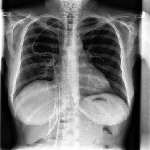

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [ ]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[2445:2455], train_labels_enc[2445:2455])

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis'] [0 0 0 0 0 1 1 1 1 1]


# 2. Model Geliştirme

In [ ]:
import glob
import numpy as np
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

input_shape = (150, 150, 3)

IMG_DIM = (150, 150)

train_files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[10].split('-')[0].strip() for fn in train_files]

validation_files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[10].split('-')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[2795:2805], train_labels_enc[2795:2805])

Train dataset shape: (4900, 150, 150, 3) 	Validation dataset shape: (1050, 150, 150, 3)
['Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis', 'Tuberculosis'] [1 1 1 1 1 1 1 1 1 1]


In [ ]:
def plot_history(history, title, save_path=None):
    # Sabit dizin tanımı
    base_dir = "/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model History Graphs/"

    # Grafiklerin boyutunu ayarla
    plt.figure(figsize=(12, 5))

    # Training ve Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy Value')
    plt.legend(loc='lower right')

    # Training ve Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend(loc='upper right')

    # Ana başlığı ekle
    plt.suptitle(title, fontsize=14, fontweight='bold')  # Ana başlık

    # Grafiklerin Kaydedilmesi
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Üstteki başlığa yer bırakmak için rect kullanıldı

    if save_path is None:
      print('Model History Grafiği kaydedilmedi!')
      plt.show()
    else:
      # Kaydedilecek tam yolun oluşturulması
        full_path = f"{base_dir}{save_path}.jpg"
        plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir
        print(f"Grafikler başarıyla kaydedildi: {save_path}")
        plt.show()

# 2.1. Simple CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,024,513 (72.57 MB)

 Trainable params: 19,024,513 (72.57 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [ ]:
batch_size = 32
num_classes = 2
epochs = 30

# batch_size=30 çalışabilir, ancak 32 veya 64 gibi 2'nin katları olan değerler genelde daha verimlidir çünkü GPU optimizasyonlarına daha uygun çalışır.
# Küçük batch boyutları daha ayrıntılı öğrenme sağlar ancak eğitim süresi artabilir. Büyük batch boyutları ise daha hızlı eğitim sağlar ancak öğrenme hassasiyeti azalabilir.

history = model.fit(x=train_imgs_scaled, y=train_labels_enc, validation_data=(validation_imgs_scaled, validation_labels_enc), batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7099 - loss: 0.7165 - val_accuracy: 0.8724 - val_loss: 0.2813
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9084 - loss: 0.2333 - val_accuracy: 0.8438 - val_loss: 0.3050
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9565 - loss: 0.1152 - val_accuracy: 0.9600 - val_loss: 0.1131
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9796 - loss: 0.0607 - val_accuracy: 0.9533 - val_loss: 0.1407
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9873 - loss: 0.0356 - val_accuracy: 0.9476 - val_loss: 0.2184
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9887 - loss: 0.0324 - val_accuracy: 0.9781 - val_loss: 0.0930
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9771 - val_loss: 0.0990
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accu

Grafikler başarıyla kaydedildi: aue_tb_basic_cnn


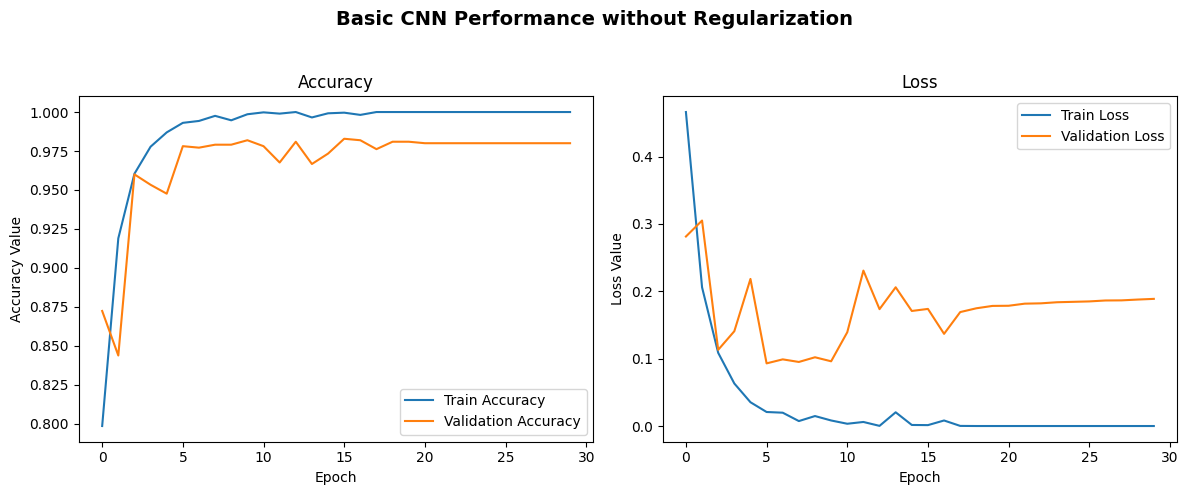

In [ ]:
plot_history(history, title='Basic CNN Performance without Regularization', save_path='aue_tb_basic_cnn')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_basic_cnn.keras')

# 2.2. CNN Model with Regularization

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,113 (14.14 MB)

 Trainable params: 3,706,113 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc, validation_data=(validation_imgs_scaled, validation_labels_enc), batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.5911 - loss: 0.6505 - val_accuracy: 0.5143 - val_loss: 1.6858
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8558 - loss: 0.3773 - val_accuracy: 0.9048 - val_loss: 0.2320
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9168 - loss: 0.2178 - val_accuracy: 0.9371 - val_loss: 0.1557
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9369 - loss: 0.1590 - val_accuracy: 0.9524 - val_loss: 0.1301
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9619 - loss: 0.1100 - val_accuracy: 0.9076 - val_loss: 0.2652
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9659 - loss: 0.0946 - val_accuracy: 0.9457 - val_loss: 0.1493
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9777 - loss: 0.0695 - val_accuracy: 0.9610 - val_loss: 0.1255
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9819 - loss: 0.0543 - val_acc

Grafikler başarıyla kaydedildi: aue_tb_basic_cnn_reg


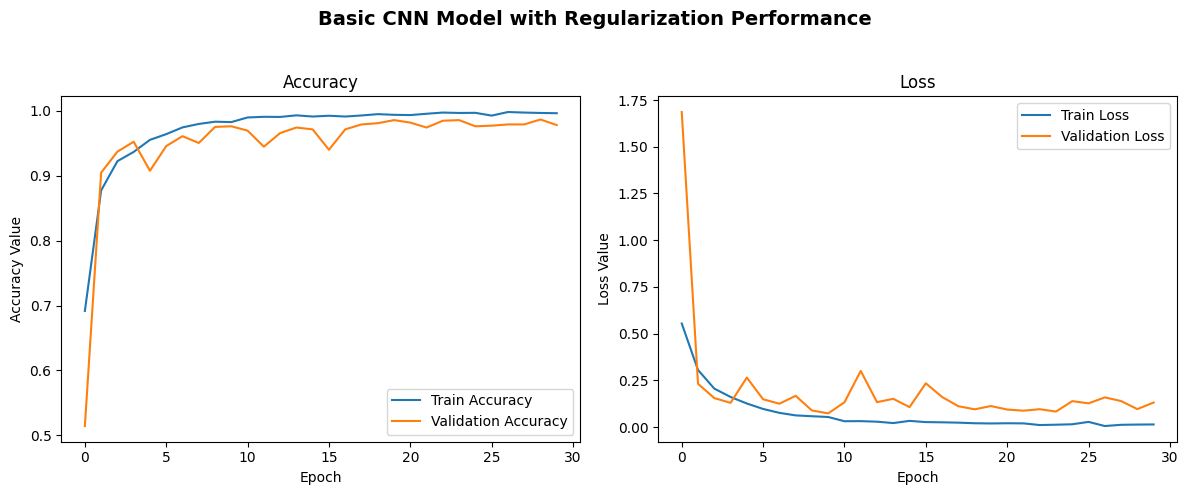

In [ ]:
plot_history(history, title='Basic CNN Model with Regularization Performance', save_path='aue_tb_basic_cnn_reg')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_basic_cnn_reg.keras')

# 2.3. CNN Model with Image Augmentation

In [ ]:
# Parametre açıklamaları:
# rescale=1./255: Görüntülerin değerlerini 0-255 aralığından 0-1 aralığına dönüştürür, bu normalizasyon aşamasıdır.
# zoom_range=0.3: Görüntüyü rastgele %30 oranında yakınlaştırır.
# rotation_range=50: Görüntüyü rastgele 50 dereceye kadar döndürür.
# width_shift_range=0.2: Görüntüyü yatayda rastgele %20 oranında kaydırır.
# height_shift_range=0.2: Görüntüyü dikeyde rastgele %20 oranında kaydırır.
# shear_range=0.2: Görüntüye %20 oranında kayma (shear) uygular.
# horizontal_flip=True: Görüntüyü yatayda çevirir.
# fill_mode='nearest': Boş alanları en yakın pikselin değerleriyle doldurur.

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     zoom_range=0.2,  # Daha az agresif zoom
#     rotation_range=10,  # Anatomik yapıyı koruyacak şekilde döndürme
#     width_shift_range=0.1,  # Küçük yatay kayma
#     height_shift_range=0.1,  # Küçük dikey kayma
#     shear_range=0,  # Shear işlemi kapalı
#     horizontal_flip=False,  # Yatay çevirme kapalı
#     fill_mode='nearest'  # Boş alanları doldurma
# )

# val_datagen = ImageDataGenerator(rescale=1./255)  # Doğrulama veri seti için augmentation uygulanmaz

Labels: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal']


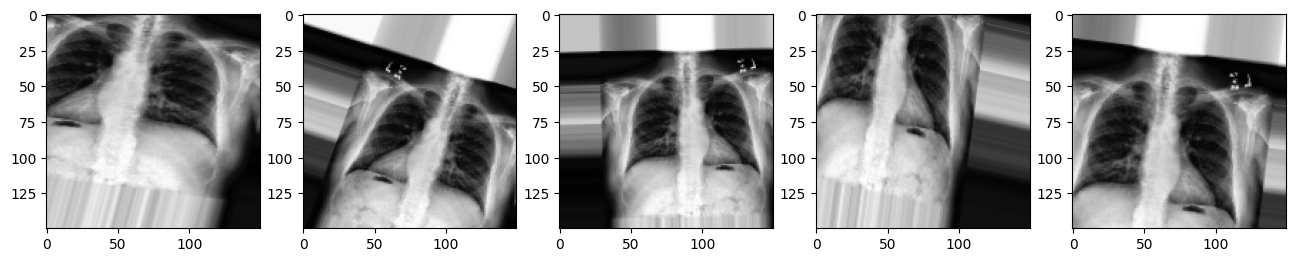

In [ ]:
img_id = 250
normal_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(normal_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal']


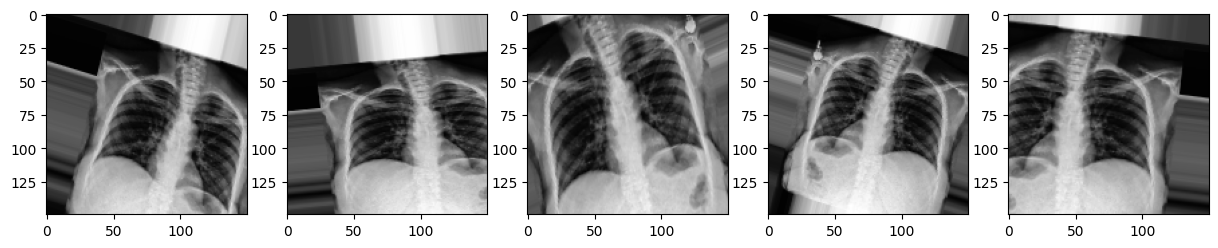

In [ ]:
img_id = 500
tb_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(tb_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,113 (14.14 MB)

 Trainable params: 3,706,113 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [ ]:
import tensorflow as tf
print("GPU kullanılabilir mi:", tf.test.is_gpu_available())

!nvidia-smi

GPU kullanılabilir mi: True
Sun Dec  8 21:59:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              30W /  70W |   9353MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+---------------------------------------

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.5402 - loss: 0.6859 - val_accuracy: 0.7676 - val_loss: 0.5639
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.6667 - loss: 0.6123 - val_accuracy: 0.7819 - val_loss: 0.4746
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7191 - loss: 0.5575 - val_accuracy: 0.8029 - val_loss: 0.4455
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7457 - loss: 0.5128 - val_accuracy: 0.8190 - val_loss: 0.3893
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7825 - loss: 0.4687 - val_accuracy: 0.7990 - val_loss: 0.4427
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7857 - loss: 0.4729 - val_accuracy: 0.8324 - val_loss: 0.3779
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.7973 - loss: 0.4292 - val_accuracy: 0.8324 - val_loss: 0.3737
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.8149 - loss: 0.411

Grafikler başarıyla kaydedildi: aue_tb_cnn_img_aug


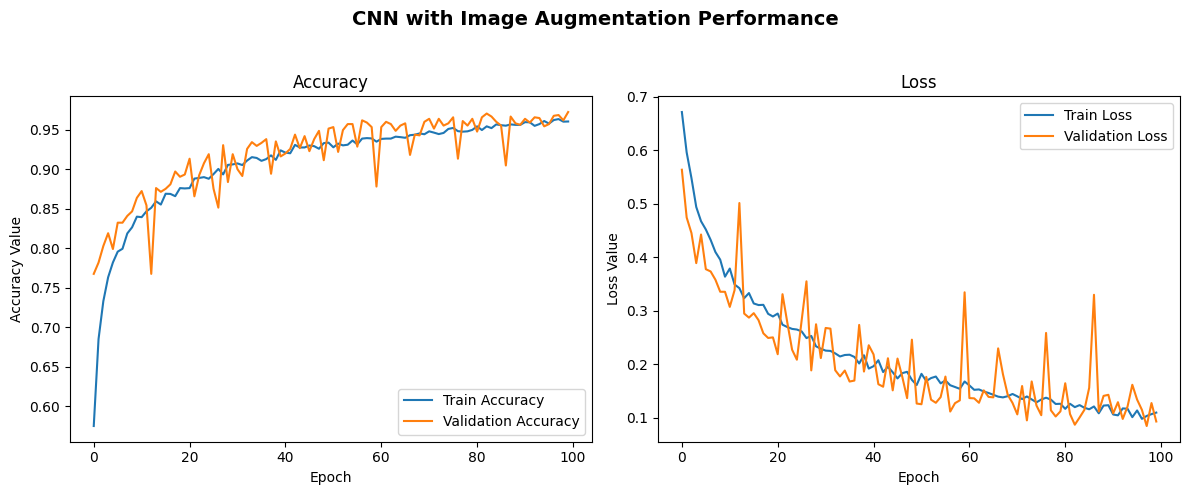

In [ ]:
plot_history(history, title='CNN with Image Augmentation Performance', save_path='aue_tb_cnn_img_aug')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_cnn_img_aug.keras')

# 2.4. Leveraging Transfer Learning with Pre-trained CNN Models

# 2.4.1. Pre-trained CNN model as a Feature Extractor

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_12, built=True>",input_layer_12,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 4, 4, 512)


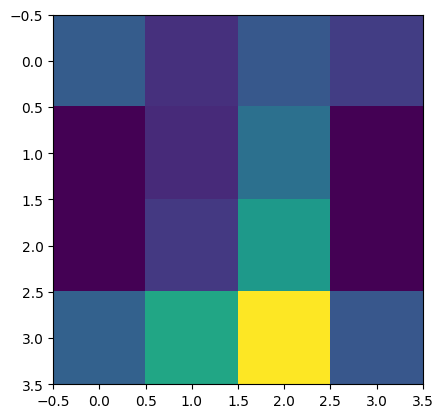

In [ ]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (4900, 8192) 	Validation Bottleneck Features: (1050, 8192)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

# input_shape = vgg_model.output_shape[1]
input_shape = train_features_vgg.shape[1]


# print(input_shape)

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,457,985 (17.01 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 8192)


In [ ]:
history = model.fit(x=train_features_vgg, y=train_labels_enc, validation_data=(validation_features_vgg, validation_labels_enc), batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7876 - loss: 0.4331 - val_accuracy: 0.9371 - val_loss: 0.1588
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.1876 - val_accuracy: 0.9638 - val_loss: 0.1025
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.1241 - val_accuracy: 0.9571 - val_loss: 0.1004
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.0894 - val_accuracy: 0.9771 - val_loss: 0.0657
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.0734 - val_accuracy: 0.9533 - val_loss: 0.1234
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.0671 - val_accuracy: 0.9790 - val_loss: 0.0529
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0506 - val_accuracy: 0.9467 - val_loss: 0.1545
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0471 - val_accuracy: 0

Grafikler başarıyla kaydedildi: aue_tb_tlearn_basic_cnn


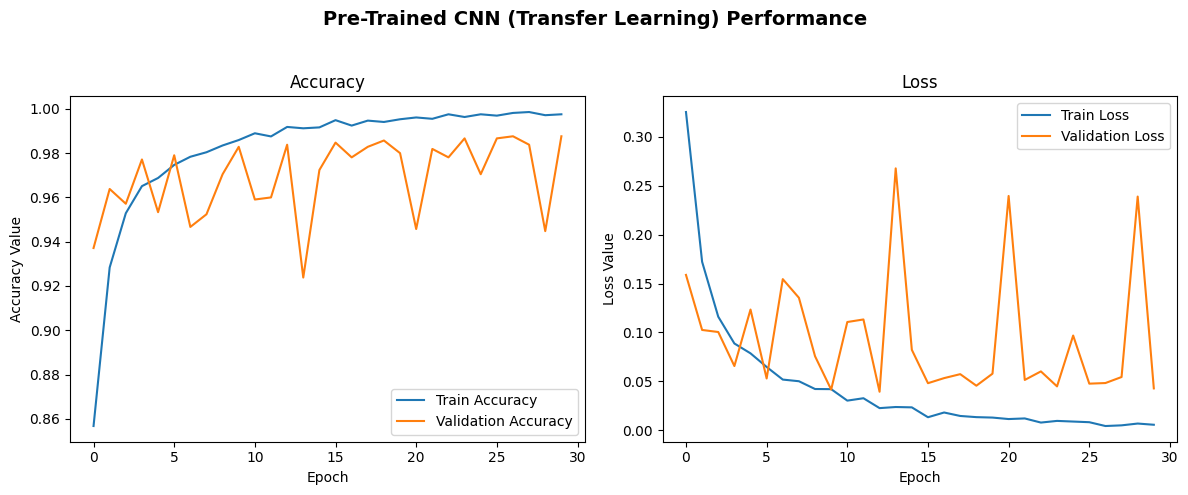

In [ ]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) Performance', save_path='aue_tb_tlearn_basic_cnn')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_basic_cnn.keras')

# 2.4.1.1. Pre-trained CNN model as a Feature Extractor with Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_148 (Functional)          │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 211ms/step - accuracy: 0.6250 - loss: 0.6396 - val_accuracy: 0.7771 - val_loss: 0.4517
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.7920 - loss: 0.4523 - val_accuracy: 0.8267 - val_loss: 0.3911
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.8292 - loss: 0.3922 - val_accuracy: 0.8848 - val_loss: 0.3038
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - accuracy: 0.8387 - loss: 0.3662 - val_accuracy: 0.8943 - val_loss: 0.2848
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.8488 - loss: 0.3409 - val_accuracy: 0.8971 - val_loss: 0.2648
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - accuracy: 0.8645 - loss: 0.3069 - val_accuracy: 0.9010 - val_loss: 0.2656
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.8676 - loss: 0.3109 - val_accuracy: 0.9076 - val_loss: 0.2539
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.8724 - loss: 0.296

Grafikler başarıyla kaydedildi: aue_tb_tlearn_img_aug_cnn


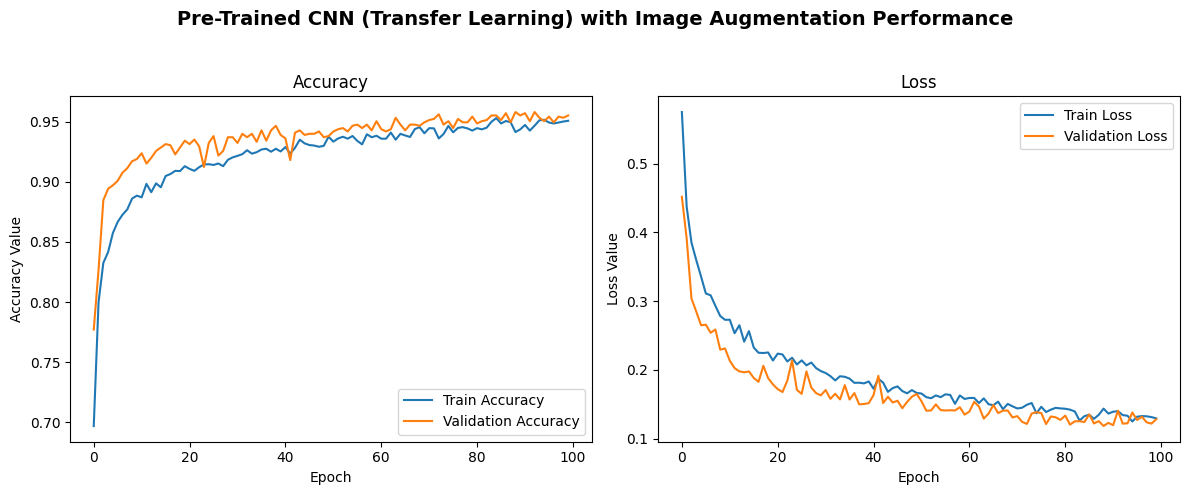

In [ ]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) with Image Augmentation Performance', save_path='aue_tb_tlearn_img_aug_cnn')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_img_aug_cnn.keras')

# 2.5. Pre-trained CNN model with Fine-tuning and Image Augmentation

In [ ]:
# from keras.applications import vgg16
# from keras.models import Model
# import keras

# vgg = vgg16.VGG16(include_top=False, weights='imagenet',
#                                      input_shape=input_shape)

# output = vgg.layers[-1].output
# output = keras.layers.Flatten()(output)
# vgg_model = Model(vgg.input, output)

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_12, built=True>",input_layer_12,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
               metrics=['accuracy', 'Precision', 'Recall'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_148 (Functional)          │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 17,437,185 (66.52 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - Precision: 0.6546 - Recall: 0.6175 - accuracy: 0.6630 - loss: 0.5954 - val_Precision: 0.8961 - val_Recall: 0.9200 - val_accuracy: 0.9067 - val_loss: 0.2397
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - Precision: 0.8717 - Recall: 0.8756 - accuracy: 0.8717 - loss: 0.3062 - val_Precision: 0.9655 - val_Recall: 0.9067 - val_accuracy: 0.9371 - val_loss: 0.1767
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - Precision: 0.9068 - Recall: 0.9020 - accuracy: 0.9050 - loss: 0.2366 - val_Precision: 0.9811 - val_Recall: 0.8895 - val_accuracy: 0.9362 - val_loss: 0.1776
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - Precision: 0.9302 - Recall: 0.9202 - accuracy: 0.9259 - loss: 0.2015 - val_Precision: 0.9932 - val_Recall: 0.8343 - val_accuracy: 0.9143 - val_loss: 0.2351
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - Precision: 0.9395 - Recall: 0.9350 - accuracy: 0.9346 - loss: 0.1731 - val_Precision: 0.9858 - val

Grafikler başarıyla kaydedildi: aue_tb_tlearn_finetune_img_aug_cnn


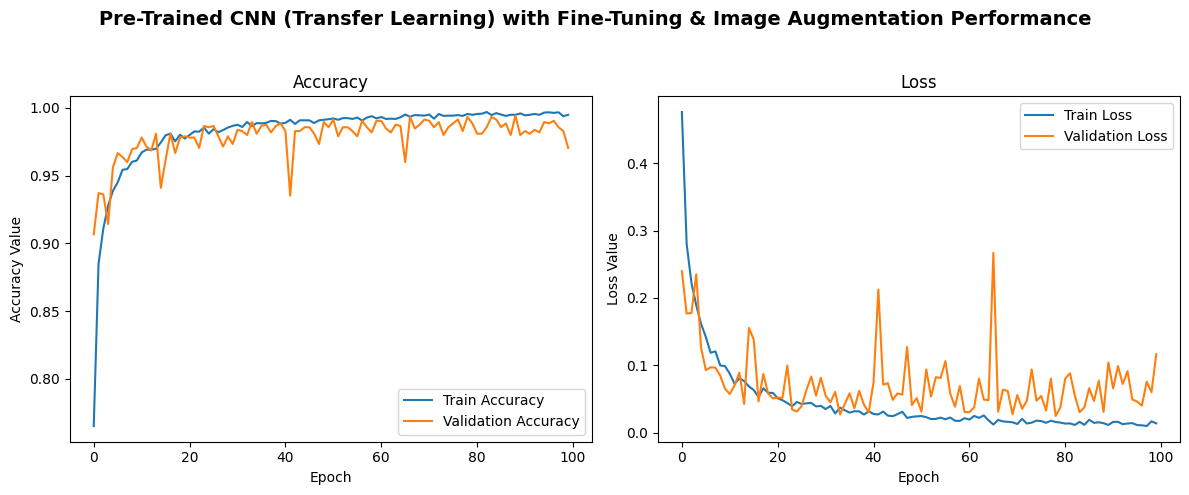

In [ ]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', save_path='aue_tb_tlearn_finetune_img_aug_cnn')

In [ ]:
model.save('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_finetune_img_aug_cnn.keras')

# 3. Evaluating our Deep Learning Models on Test Data

In [ ]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
# import model_evaluation_utils as meu
%matplotlib inline

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


def confusion_matrix_plot(model, test_data, test_labels, save_path=None):
  # """
  # Confusion Matrix'i hesaplar ve görselleştirir.

  # Args:
  #   model: Eğitilmiş Keras modeli.
  #   test_data: Test verileri.
  #   test_labels: Test etiketleri.
  # """

  # Sabit dizin tanımı
  base_dir = "/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/"

  # Tahminleri al
  predictions = model.predict(test_data)

  # Tahminleri ikili sınıflara dönüştür
  predicted_labels = (predictions > 0.5).astype(int)

  # Confusion Matrix'i hesapla
  cm = confusion_matrix(test_labels, predicted_labels)

  # Confusion Matrix'i görselleştir
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
  plt.xlabel('Tahmin Edilen Etiket')
  plt.ylabel('Gerçek Etiket')
  # plt.title('Confusion Matrix')
  plt.title(f"{save_path} Confusion Matrix")

  # # Ana başlığı ekle
  # plt.suptitle(save_path, fontsize=14, fontweight='bold')  # Ana başlık

  # # Grafiklerin Kaydedilmesi
  # plt.tight_layout(rect=[0, 0, 1, 0.95])  # Üstteki başlığa yer bırakmak için rect kullanıldı

  if save_path:
    # Kaydedilecek tam yolun oluşturulması
    full_path = f"{base_dir}{save_path}.jpg"
    plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir

    print(f"Confusion Matrix grafiği {full_path} konumuna kaydedildi.")

  plt.show()

def plot_roc_curve(model, test_imgs_scaled, test_labels_enc, save_path=None):  # Change the function name
  # Sabit dizin tanımı
  base_dir = "/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/"

  y_pred = model.predict(test_imgs_scaled)

  fpr, tpr, thresholds = roc_curve(test_labels_enc, y_pred) # This now refers to the correct function
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

  if save_path:
    # Kaydedilecek tam yolun oluşturulması
    full_path = f"{base_dir}{save_path}.jpg"
    plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir

    print(f"ROC Curve grafiği {full_path} konumuna kaydedildi.")

  plt.show()

def evaluate_model(model, X_test, y_test, class_names):
    # Modelin tahminlerini alın
    predictions = model.predict(X_test)
    y_pred = (predictions > 0.5).astype(int).flatten()  # Sigmoid çıkışını sınıflandırmaya dönüştür

    # y_test zaten binary olduğu için direk kullanabiliriz
    y_true = y_test

    # Karışıklık matrisi
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Sınıflandırma raporu
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("\nClassification Report:")
    print(report)

In [ ]:
# load saved models
basic_cnn = load_model('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_basic_cnn.keras')
img_aug_cnn = load_model('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_cnn_img_aug.keras')
tl_cnn = load_model('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_basic_cnn.keras')
tl_img_aug_cnn = load_model('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_img_aug_cnn.keras')
tl_img_aug_finetune_cnn = load_model('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/models/aue_tb_tlearn_finetune_img_aug_cnn.keras')

In [ ]:
# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['Normal' if x == 0 else 'Tuberculosis' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'Normal' else 1 for x in l]

In [ ]:
# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

In [ ]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [ ]:
IMG_DIM = (150, 150)

test_files = glob.glob('/content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Partitioned Data/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[10].split('-')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1050, 150, 150, 3)
['Normal', 'Normal', 'Normal', 'Normal', 'Normal'] [0, 0, 0, 0, 0]


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
[[513  12]
 [ 10 515]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       525
Tuberculosis       0.98      0.98      0.98       525

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/basic_cnn.jpg konumuna kaydedildi.


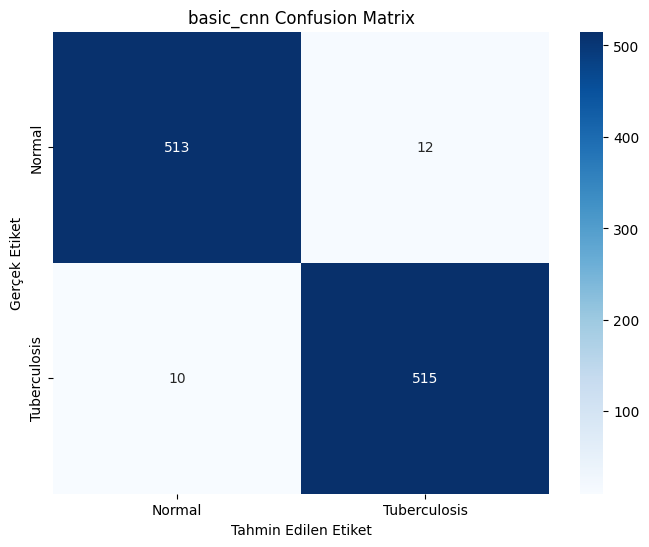

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/basic_cnn.jpg konumuna kaydedildi.


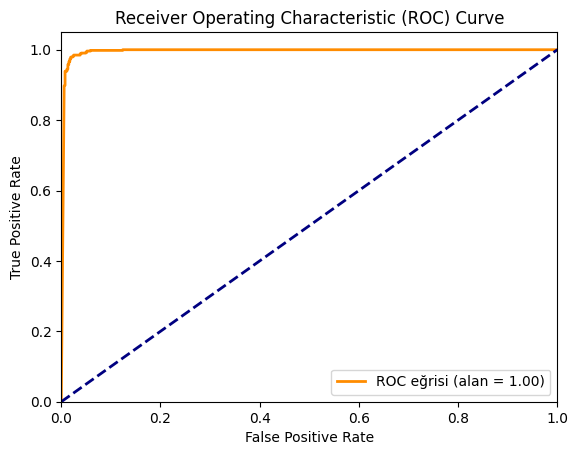

In [ ]:
target_names = ['Normal', 'Tuberculosis']

evaluate_model(model=basic_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(basic_cnn, test_imgs_scaled, validation_labels_enc, save_path='basic_cnn')

plot_roc_curve(model=basic_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='basic_cnn')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
[[516   9]
 [ 13 512]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       525
Tuberculosis       0.98      0.98      0.98       525

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/img_aug_cnn.jpg konumuna kaydedildi.


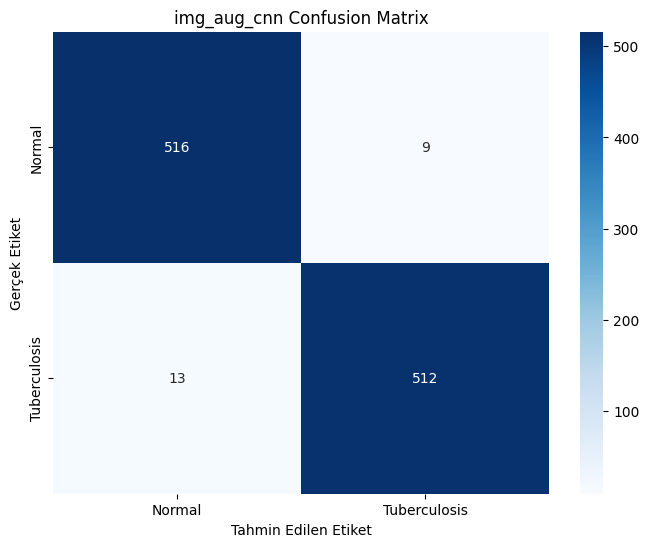

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/img_aug_cnn.jpg konumuna kaydedildi.


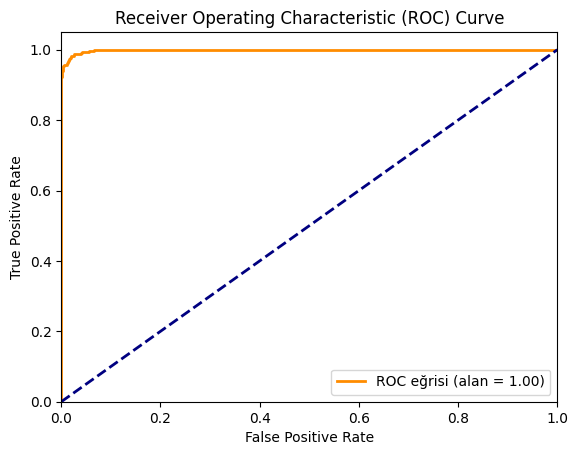

In [ ]:
evaluate_model(model=img_aug_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(img_aug_cnn, test_imgs_scaled, validation_labels_enc, save_path='img_aug_cnn')

plot_roc_curve(model=img_aug_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='img_aug_cnn')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[513  12]
 [  5 520]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       525
Tuberculosis       0.98      0.99      0.98       525

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/tl_cnn.jpg konumuna kaydedildi.


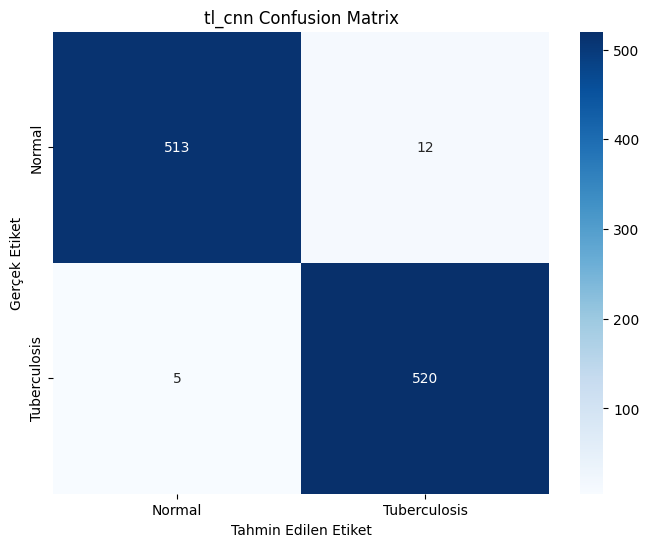

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
ROC Curve grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/tl_cnn.jpg konumuna kaydedildi.


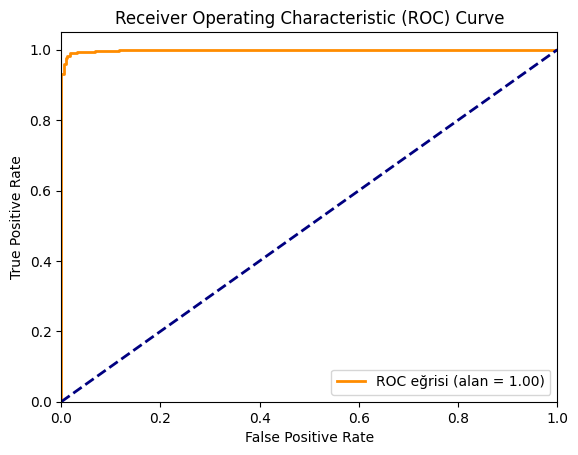

In [ ]:
test_features = get_bottleneck_features(vgg_model, test_imgs_scaled)


evaluate_model(model=tl_cnn, X_test=test_features, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_cnn, test_features, validation_labels_enc, save_path='tl_cnn')

plot_roc_curve(model=tl_cnn, test_imgs_scaled=test_features, test_labels_enc=test_labels_enc, save_path='tl_cnn')

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Confusion Matrix:
[[504  21]
 [ 30 495]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       525
Tuberculosis       0.96      0.94      0.95       525

    accuracy                           0.95      1050
   macro avg       0.95      0.95      0.95      1050
weighted avg       0.95      0.95      0.95      1050

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/tl_img_aug_cnn.jpg konumuna kaydedildi.


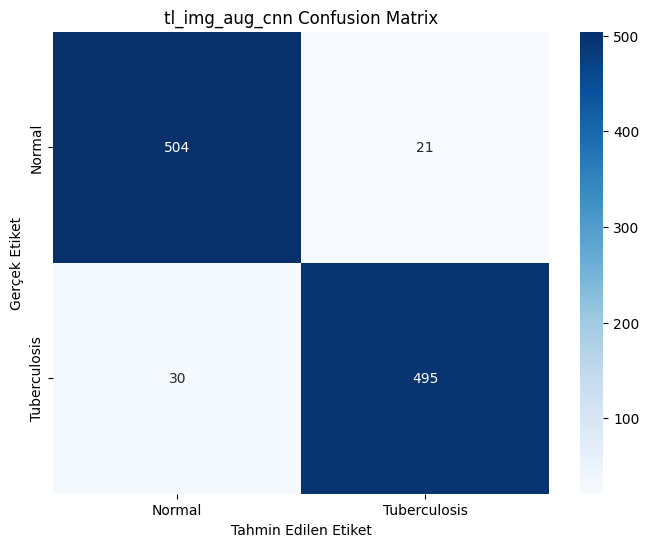

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/tl_img_aug_cnn.jpg konumuna kaydedildi.


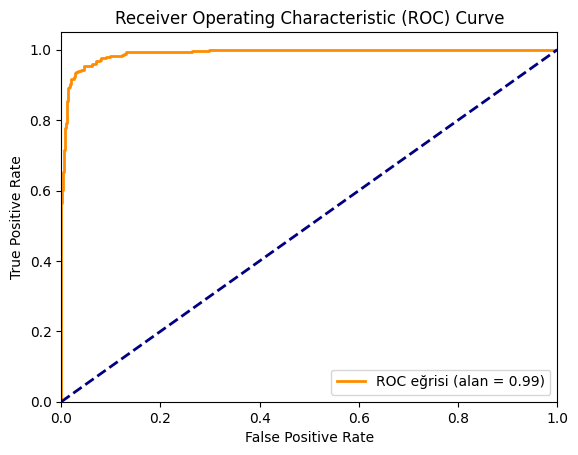

In [ ]:
evaluate_model(model=tl_img_aug_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_img_aug_cnn, test_imgs_scaled, validation_labels_enc, save_path='tl_img_aug_cnn')

plot_roc_curve(model=tl_img_aug_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='tl_img_aug_cnn')

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
Confusion Matrix:
[[500  25]
 [  0 525]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.98       525
Tuberculosis       0.95      1.00      0.98       525

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model Confusion Matrix/tl_img_aug_finetune_cnn.jpg konumuna kaydedildi.


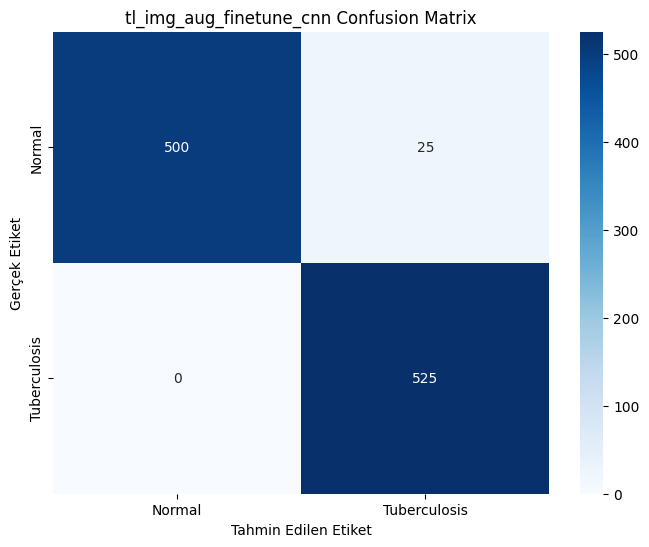

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TB_TL/dataset/Tuberculosis (TB) Chest X-ray Used Database/Tuberculosis (TB) Chest X-ray Preprocessed Data/Model ROC Curve Graphs/tl_img_aug_finetune_cnn.jpg konumuna kaydedildi.


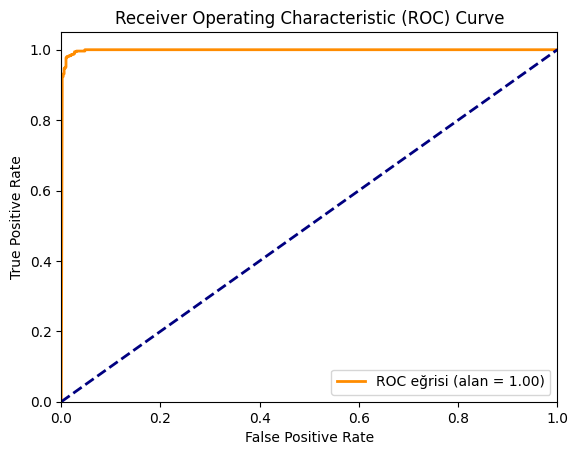

In [ ]:
evaluate_model(model=tl_img_aug_finetune_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_img_aug_finetune_cnn, test_imgs_scaled, validation_labels_enc, save_path='tl_img_aug_finetune_cnn')

plot_roc_curve(model=tl_img_aug_finetune_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='tl_img_aug_finetune_cnn')